# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Pramatya Sudjana
- **Email:** pramatyasudjana.gms4@gmail.com
- **ID Dicoding:** bukantokobatik

## Menentukan Pertanyaan Bisnis

- Bagaimana tren penggunaan bike sharing pada tahun 2011 dan 2012?
- Apa saja faktor yang mempengaruhi penggunaan bike sharing?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv("https://raw.githubusercontent.com/rhinzz/bike-sharing-dashboard/refs/heads/main/dataset/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/rhinzz/bike-sharing-dashboard/refs/heads/main/dataset/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Terdapat dua file dataset, yaitu day.csv dan hour.csv, yang diimport menjadi dua dataframe yaitu day_df dan hour_df
- Pada kolom temp, atemp, dan hum perlu dikonversikan sesuai dengan dokumentasi
- Terdapat 16 kolom pada day_df dan 17 kolom pada hour_df

### Assessing Data

Menilai day_df

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [6]:
print('Duplikasi: ', day_df.duplicated().sum())

Duplikasi:  0


In [7]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Menilai hour_df

In [8]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [9]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [10]:
print('Duplikasi: ', hour_df.duplicated().sum())

Duplikasi:  0


In [11]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Data yang terdapat dalam dua dataframe tersebut sudah bersih
- Tipe data pada kolom dteday pada kedua data frame tersebut masih object

### Cleaning Data

Mengubah tipe data pada kolom dteday pada day_df

In [12]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [13]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Mengalikan kolom temp pada dua tabel agar memiliki nilai celcius

In [14]:
day_df['temp'] = day_df['temp'] * 41
hour_df['temp'] = hour_df['temp'] * 41

Mengalikan kolom atemp pada dua tabel agar memiliki nilai celcius

In [15]:
day_df['atemp'] = day_df['atemp'] * 50
hour_df['atemp'] = hour_df['atemp'] * 50

Mengalikan kolom hum pada dua tabel agar memiliki nilai persen

In [16]:
day_df['hum'] = day_df['hum'] * 100
hour_df['hum'] = hour_df['hum'] * 100

Mengalikan kolom windspeed pada dua tabel agar memiliki satuan yang tepat

In [17]:
day_df['windspeed'] = day_df['windspeed'] * 100
hour_df['windspeed'] = hour_df['windspeed'] * 100

In [18]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,16.0446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,24.8539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,24.8309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,16.0296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,18.6900,82,1518,1600


Mengubah tipe data dteday pada hour_df

In [19]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- Tipe data kolom sudah diganti dan siap untuk proses selanjutnya

## Exploratory Data Analysis (EDA)

### Explore day_df

In [20]:
day_df.sample(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
85,86,2011-03-27,2,0,3,0,0,0,2,10.374763,12.51695,49.3913,18.43000,472,1221,1693
431,432,2012-03-07,1,1,3,0,3,1,1,16.570847,19.25500,51.3333,34.57790,432,4484,4916
382,383,2012-01-18,1,1,1,0,3,1,1,12.436653,13.76270,44.3333,41.54290,109,3267,3376
427,428,2012-03-03,1,1,3,0,6,0,2,16.980847,20.67460,62.1250,16.10790,956,3110,4066
189,190,2011-07-09,3,0,7,0,6,0,1,30.066653,33.20790,60.9167,16.79120,1988,3348,5336
367,368,2012-01-03,1,1,1,0,2,1,1,6.150000,6.31375,44.1250,36.56710,89,2147,2236
619,620,2012-09-11,3,1,9,0,2,1,1,23.677500,27.71460,52.0000,9.20542,1070,6697,7767
471,472,2012-04-16,2,1,4,1,1,0,1,27.230847,30.74625,56.1667,28.48290,1198,5172,6370
211,212,2011-07-31,3,0,7,0,0,0,1,33.039153,36.48980,48.0833,16.48130,1524,2778,4302
522,523,2012-06-06,2,1,6,0,3,1,1,22.720847,27.11460,61.1250,7.71250,1027,6028,7055


In [21]:
day_df.describe(include= 'all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,20.310776,23.717699,62.789406,19.048621,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,2.239170,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.820424,16.892125,52.000000,13.495000,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,20.431653,24.336650,62.666700,18.097500,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.872076,30.430100,73.020850,23.321450,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,50.746300,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,7.505091,8.148059,14.242910,7.749787,686.622488,1560.256377,1937.211452


In [22]:
day_df.groupby(by="holiday").agg({
    "instant": "nunique",
    "casual": ["max", "min", "mean", "std", ]
})

instant casual                              
        nunique    max  min         mean         std
holiday                                             
0           710   3410    2   841.771831  680.528529
1            21   3065  117  1064.714286  860.046809

In [23]:
day_df.groupby(by="weekday").agg({
    "instant": "nunique",
    "casual": ["max", "min", "mean", "std", ]
})

instant casual                             
        nunique    max min         mean         std
weekday                                            
0           105   3283  54  1338.295238  809.324777
1           105   3065   2   674.133333  493.777298
2           104   1348   9   556.182692  342.748705
3           104   2562   9   551.144231  401.808954
4           104   1405  15   590.961538  371.680307
5           104   2469  38   752.288462  483.422400
6           105   3410  57  1465.257143  927.082884

In [24]:
day_df.groupby(by="workingday").agg({
    "instant": "nunique",
    "casual": ["max", "min", "mean", "std", ]
})

instant casual                             
           nunique    max min         mean         std
workingday                                            
0              231   3410  54  1371.134199  873.064794
1              500   2469   2   606.570000  391.496032

In [25]:
day_df.groupby(by="holiday").agg({
    "instant": "nunique",
    "registered": ["max", "min", "mean", "std", ]
})

instant registered                               
        nunique        max  min         mean          std
holiday                                                  
0           710       6946   20  3685.332394  1553.704431
1            21       5172  573  2670.285714  1492.860246

In [26]:
day_df.groupby(by="weekday").agg({
    "instant": "nunique",
    "registered": ["max", "min", "mean", "std", ]
})

instant registered                                
        nunique        max   min         mean          std
weekday                                                   
0           105       5657   451  2890.533333  1179.713036
1           105       6435    20  3663.990476  1504.215925
2           104       6697   573  3954.480769  1549.462149
3           104       6946   432  3997.394231  1723.710208
4           104       6781   416  4076.298077  1642.753330
5           104       6917  1129  3938.000000  1494.998698
6           105       5966   570  3085.285714  1358.068784

In [27]:
day_df.groupby(by="workingday").agg({
    "instant": "nunique",
    "registered": ["max", "min", "mean", "std", ]
})

instant registered                               
           nunique        max  min         mean          std
workingday                                                  
0              231       5966  451  2959.034632  1293.867686
1              500       6946   20  3978.250000  1568.692453

In [28]:
day_df.groupby(by="holiday").agg({
    "instant": "nunique",
    "cnt": ["max", "min", "mean", "std", ]
})

instant   cnt                                
        nunique   max   min         mean          std
holiday                                              
0           710  8714    22  4527.104225  1929.013947
1            21  7403  1000  3735.000000  2103.350660

In [29]:
day_df.groupby(by="weekday").agg({
    "instant": "nunique",
    "cnt": ["max", "min", "mean", "std", ]
})

instant   cnt                                
        nunique   max   min         mean          std
weekday                                              
0           105  8227   605  4228.828571  1872.496629
1           105  7525    22  4338.123810  1793.074013
2           104  7767   683  4510.663462  1826.911642
3           104  8173   441  4548.538462  2038.095884
4           104  7804   431  4667.259615  1939.433317
5           104  8362  1167  4690.288462  1874.624870
6           105  8714   627  4550.542857  2196.693009

In [30]:
day_df.groupby(by="workingday").agg({
    "instant": "nunique",
    "cnt": ["max", "min", "mean", "std", ]
})

instant   cnt                               
           nunique   max  min         mean          std
workingday                                             
0              231  8714  605  4330.168831  2052.141245
1              500  8362   22  4584.820000  1878.415583

In [31]:
day_df.sample(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
299,300,2011-10-27,4,0,10,0,4,1,2,19.270000,22.85230,81.2917,19.77630,240,2419,2659
543,544,2012-06-27,3,1,6,0,3,1,1,28.597500,32.03960,36.0000,27.17750,1077,6258,7335
706,707,2012-12-07,4,1,12,0,5,1,2,13.154153,16.09790,76.4167,13.06000,349,4659,5008
550,551,2012-07-04,3,1,7,1,3,0,1,32.355847,36.61685,53.8750,13.49500,2562,4841,7403
383,384,2012-01-19,1,1,1,0,4,1,1,7.790000,9.50190,49.7500,22.01580,130,3162,3292
344,345,2011-12-11,4,0,12,0,0,0,1,9.054153,12.65770,49.0000,6.65417,377,2366,2743
612,613,2012-09-04,3,1,9,0,2,1,1,29.759153,34.34440,75.5000,23.63210,867,5997,6864
351,352,2011-12-18,4,0,12,0,0,0,1,9.771653,12.27895,58.6250,16.97790,220,2211,2431
289,290,2011-10-17,4,0,10,0,1,1,1,21.900847,25.53625,57.9583,17.53790,713,3857,4570
201,202,2011-07-21,3,0,7,0,4,1,2,33.415000,41.31855,69.1250,22.20210,632,3152,3784


Explore hour_df

In [32]:
hour_df.groupby(by="hr").agg({
    "instant": "nunique",
    "casual": ["max", "min", "mean", "std", ]
})

instant casual                          
   nunique    max min       mean        std
hr                                         
0      726     68   0  10.158402  10.667953
1      724     49   0   6.504144   7.735334
2      715     44   0   4.772028   6.514780
3      697     26   0   2.715925   4.315795
4      697     13   0   1.253945   1.887669
5      717     16   0   1.411437   1.790581
6      725     19   0   4.161379   3.691509
7      727     40   0  11.055021   8.356205
8      727     69   0  21.679505  13.741229
9      727    142   0  30.891334  24.472856
10     727    209   0  46.477304  41.346206
11     727    268   0  59.540578  54.481788
12     728    362   0  68.293956  64.394237
13     729    355   0  72.308642  69.819228
14     729    361   0  75.567901  71.599225
15     729    357   0  74.905350  70.289359
16     730    367   0  73.745205  67.015206
17     730    347   0  74.273973  61.491021
18     728    266   0  61.120879  50.981553
19     728    230   0  48.770604  42.328913
20     728    237   0  36.233516  32.103347
21     728    222   0  28.255495  25.378252
22     728    175   0  22.252747  20.450211
23     728     71   0  15.199176  13.804596

In [33]:
hour_df.groupby(by="hr").agg({
    "instant": "nunique",
    "registered": ["max", "min", "mean", "std", ]
})

instant registered                            
   nunique        max min        mean         std
hr                                               
0      726        234   0   43.739669   34.019585
1      724        139   0   26.871547   27.344153
2      715        104   0   18.097902   21.303895
3      697         61   0    9.011478    9.743691
4      697         22   0    5.098996    3.134479
5      717         64   0   18.478382   12.674751
6      725        203   0   71.882759   53.535307
7      727        572   1  201.009629  157.120459
8      727        808   4  337.331499  229.698404
9      727        399   6  188.418157   84.633490
10     727        351   8  127.191197   66.281668
11     727        446   5  148.602476   79.090301
12     728        526   3  185.021978   89.240873
13     729        491   9  181.352538   87.424775
14     729        502  12  165.381344   84.055205
15     729        456   4  176.327846   84.488219
16     730        481   8  238.238356  103.765726
17     730        885  14  387.178082  211.676303
18     728        886  20  364.390110  203.599896
19     728        662  11  262.752747  138.708622
20     728        461   8  189.796703  100.293791
21     728        362   6  144.059066   73.149848
22     728        327   5  109.082418   55.252765
23     728        220   2   72.631868   40.446431

In [34]:
hour_df.groupby(by="hr").agg({
    "instant": "nunique",
    "cnt": ["max", "min", "mean", "std", ]
})

instant  cnt                            
   nunique  max min        mean         std
hr                                         
0      726  283   2   53.898072   42.307910
1      724  168   1   33.375691   33.538727
2      715  132   1   22.869930   26.578642
3      697   79   1   11.727403   13.239190
4      697   28   1    6.352941    4.143818
5      717   66   1   19.889819   13.200765
6      725  213   1   76.044138   55.084348
7      727  596   1  212.064649  161.441936
8      727  839   5  359.011004  235.189285
9      727  426  14  219.309491   93.703458
10     727  539   8  173.668501  102.205413
11     727  663  10  208.143054  127.495536
12     728  776   3  253.315934  145.081134
13     729  760  11  253.661180  148.107657
14     729  750  12  240.949246  147.271574
15     729  750   7  251.233196  144.632541
16     730  783  11  311.983562  148.682618
17     730  976  15  461.452055  232.656611
18     728  977  23  425.510989  224.639304
19     728  743  11  311.523352  161.050359
20     728  567  11  226.030220  119.670164
21     728  584   6  172.314560   89.788893
22     728  502   9  131.335165   69.937782
23     728  256   2   87.831044   50.846889

Explore all data

Merge day_df dan hour_df

In [35]:
all_df = pd.merge(hour_df, day_df, on='dteday', suffixes=('_hour', '_day'))
all_df= all_df.drop(columns=['instant_day','season_day', 'yr_day','mnth_day','holiday_day', 'weekday_day', 'workingday_day'])
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   instant_hour     17379 non-null  int64         
 1   dteday           17379 non-null  datetime64[ns]
 2   season_hour      17379 non-null  int64         
 3   yr_hour          17379 non-null  int64         
 4   mnth_hour        17379 non-null  int64         
 5   hr               17379 non-null  int64         
 6   holiday_hour     17379 non-null  int64         
 7   weekday_hour     17379 non-null  int64         
 8   workingday_hour  17379 non-null  int64         
 9   weathersit_hour  17379 non-null  int64         
 10  temp_hour        17379 non-null  float64       
 11  atemp_hour       17379 non-null  float64       
 12  hum_hour         17379 non-null  float64       
 13  windspeed_hour   17379 non-null  float64       
 14  casual_hour      17379 non-null  int64

In [36]:
all_df.columns = [col.replace('_hour', '') for col in all_df.columns]
all_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,registered,cnt,weathersit_day,temp_day,atemp_day,hum_day,windspeed_day,casual_day,registered_day,cnt_day
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,13,16,2,14.110847,18.18125,80.5833,16.0446,331,654,985
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,32,40,2,14.110847,18.18125,80.5833,16.0446,331,654,985
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,27,32,2,14.110847,18.18125,80.5833,16.0446,331,654,985
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,10,13,2,14.110847,18.18125,80.5833,16.0446,331,654,985
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,1,1,2,14.110847,18.18125,80.5833,16.0446,331,654,985


In [37]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   instant         17379 non-null  int64         
 1   dteday          17379 non-null  datetime64[ns]
 2   season          17379 non-null  int64         
 3   yr              17379 non-null  int64         
 4   mnth            17379 non-null  int64         
 5   hr              17379 non-null  int64         
 6   holiday         17379 non-null  int64         
 7   weekday         17379 non-null  int64         
 8   workingday      17379 non-null  int64         
 9   weathersit      17379 non-null  int64         
 10  temp            17379 non-null  float64       
 11  atemp           17379 non-null  float64       
 12  hum             17379 non-null  float64       
 13  windspeed       17379 non-null  float64       
 14  casual          17379 non-null  int64         
 15  re

Mengubah kode numerik pada yr, season, dan month

In [38]:
all_df.loc[all_df["yr"] == 0, "yr"] = 2011
all_df.loc[all_df["yr"] == 1, "yr"] = 2012

In [39]:
name = {
    1: "winter", 2: "spring", 3: "summer", 4: "fall"
}
all_df["season"] = all_df["season"].map(name)

In [40]:
day = {
    0: "sunday", 1: "monday", 2: "tuesday", 3: "wednesday", 4: "thursday", 5: "friday", 6: "saturday"
}
all_df["weekday"] = all_df["weekday"].map(day)

In [41]:
yes_or_no = {0 : "no", 1 : "yes"}
all_df["workingday"] = all_df["workingday"].map(yes_or_no)
all_df["holiday"] = all_df["holiday"].map(yes_or_no)

In [42]:
all_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,registered,cnt,weathersit_day,temp_day,atemp_day,hum_day,windspeed_day,casual_day,registered_day,cnt_day
0,1,2011-01-01,winter,2011,1,0,no,saturday,no,1,...,13,16,2,14.110847,18.18125,80.5833,16.0446,331,654,985
1,2,2011-01-01,winter,2011,1,1,no,saturday,no,1,...,32,40,2,14.110847,18.18125,80.5833,16.0446,331,654,985
2,3,2011-01-01,winter,2011,1,2,no,saturday,no,1,...,27,32,2,14.110847,18.18125,80.5833,16.0446,331,654,985
3,4,2011-01-01,winter,2011,1,3,no,saturday,no,1,...,10,13,2,14.110847,18.18125,80.5833,16.0446,331,654,985
4,5,2011-01-01,winter,2011,1,4,no,saturday,no,1,...,1,1,2,14.110847,18.18125,80.5833,16.0446,331,654,985


In [43]:
all_df.groupby(by=["yr", "season"]).agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

casual  registered     cnt
yr   season                            
2011 fall     52813      273324  326137
     spring   77564      269752  347316
     summer   95450      324200  419650
     winter   21425      128575  150000
2012 fall     76969      438507  515476
     spring  125958      445315  571273
     summer  130641      510838  641479
     winter   39197      282151  321348

In [44]:
all_df.groupby(by=['dteday']).agg({
    "casual_day": "first",
    "registered_day": "first",
    "cnt_day": "first"
})

,casual_day,registered_day,cnt_day
dteday,,,
2011-01-01,331,654,985
2011-01-02,131,670,801
2011-01-03,120,1229,1349
2011-01-04,108,1454,1562
2011-01-05,82,1518,1600
...,...,...,...
2012-12-27,247,1867,2114
2012-12-28,644,2451,3095
2012-12-29,159,1182,1341


In [45]:
all_df.groupby(by=['hr']).agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

,casual,registered,cnt
hr,,,
0,7375,31755,39130
1,4709,19455,24164
2,3412,12940,16352
3,1893,6281,8174
4,874,3554,4428
5,1012,13249,14261
6,3017,52115,55132
7,8037,146134,154171
8,15761,245240,261001


In [46]:
all_df.groupby(by=['mnth']).agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

,casual,registered,cnt
mnth,,,
1,12042,122891,134933
2,14963,136389,151352
3,44444,184476,228920
4,60802,208292,269094
5,75285,256401,331686
6,73906,272436,346342
7,78157,266791,344948
8,72039,279155,351194
9,70323,275668,345991


In [47]:
all_df.groupby(by=['weathersit']).agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

,casual,registered,cnt
weathersit,,,
1,462745,1875428,2338173
2,134481,661471,795952
3,22783,135548,158331
4,8,215,223


In [48]:
all_df.groupby(by=['holiday']).agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

,casual,registered,cnt
holiday,,,
no,597658,2616586,3214244
yes,22359,56076,78435


In [49]:
all_df.groupby(by=['workingday']).agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

,casual,registered,cnt
workingday,,,
no,316732,683537,1000269
yes,303285,1989125,2292410


In [50]:
all_df.to_csv("all_data.csv", index=False)

**Insight:**
- Proses merge menggabungkan dua tabel dan melakukan merging pada beberapa kolom seperti weathersit, temp, atemp, hum dan lain-lain
- Total kolom dari dataframe hasil merge adalah 25 kolom

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren penggunaan bike sharing pada tahun 2011 dan 2012?

In [73]:
all_df.sample(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,registered,cnt,weathersit_day,temp_day,atemp_day,hum_day,windspeed_day,casual_day,registered_day,cnt_day
15650,15651,2012-10-19,fall,2012,10,7,no,friday,yes,3,...,149,154,2,23.096653,26.89480,81.5000,13.49540,753,4671,5424
3995,3996,2011-06-20,spring,2011,6,9,no,monday,yes,2,...,200,219,2,26.035000,29.76730,74.6250,15.54750,699,3311,4010
15690,15691,2012-10-20,fall,2012,10,23,no,saturday,no,1,...,136,163,1,19.850847,23.64210,57.2917,11.75370,2806,5284,8090
5431,5432,2011-08-19,summer,2011,8,5,no,friday,yes,1,...,16,17,2,28.085000,31.66105,72.2917,13.93080,797,3356,4153
10273,10274,2012-03-09,winter,2012,3,3,no,friday,yes,1,...,7,7,2,16.844153,19.85415,40.7083,41.48000,447,4122,4569
11490,11491,2012-04-28,spring,2012,4,23,no,saturday,no,2,...,37,42,2,15.443347,18.87520,48.9583,12.99750,1120,3100,4220
15152,15153,2012-09-28,fall,2012,9,13,no,friday,yes,2,...,304,410,2,25.385847,29.29315,69.0000,16.41790,1045,6370,7415
16435,16436,2012-11-22,fall,2012,11,13,yes,thursday,no,1,...,144,269,1,13.940000,17.51855,58.0417,5.28708,955,1470,2425
15819,15820,2012-10-26,fall,2012,10,8,no,friday,yes,2,...,714,734,2,22.379153,26.13750,80.7083,13.24670,1182,6262,7444
7826,7827,2011-11-27,fall,2011,11,17,no,sunday,no,1,...,167,204,1,18.825847,22.79000,69.8333,20.89540,810,2261,3071


In [52]:
all_df.groupby(by=['dteday']).agg({
    "casual_day": "sum",
    "registered_day": "sum",
}).reset_index()

,dteday,casual_day,registered_day
0,2011-01-01,7944,15696
1,2011-01-02,3013,15410
2,2011-01-03,2640,27038
3,2011-01-04,2484,33442
4,2011-01-05,1886,34914
...,...,...,...
726,2012-12-27,5928,44808
727,2012-12-28,15456,58824
728,2012-12-29,3816,28368
729,2012-12-30,8736,34368


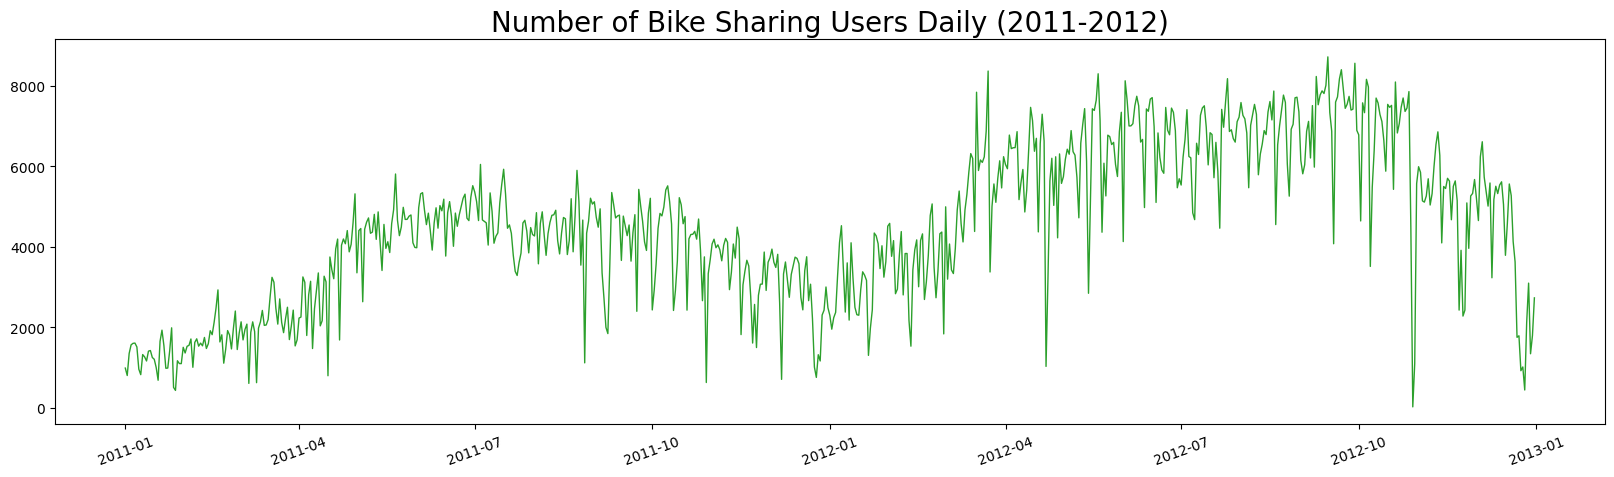

In [54]:
plt.figure(figsize=(20, 5))
plt.plot(
    all_df["dteday"],
    all_df["cnt_day"],
    linewidth=1,
    color="#2CA02C"
)
plt.title("Number of Bike Sharing Users Daily (2011-2012)", loc="center", fontsize=20)
plt.xticks(fontsize=10, rotation=20)
plt.yticks(fontsize=10)
plt.show()

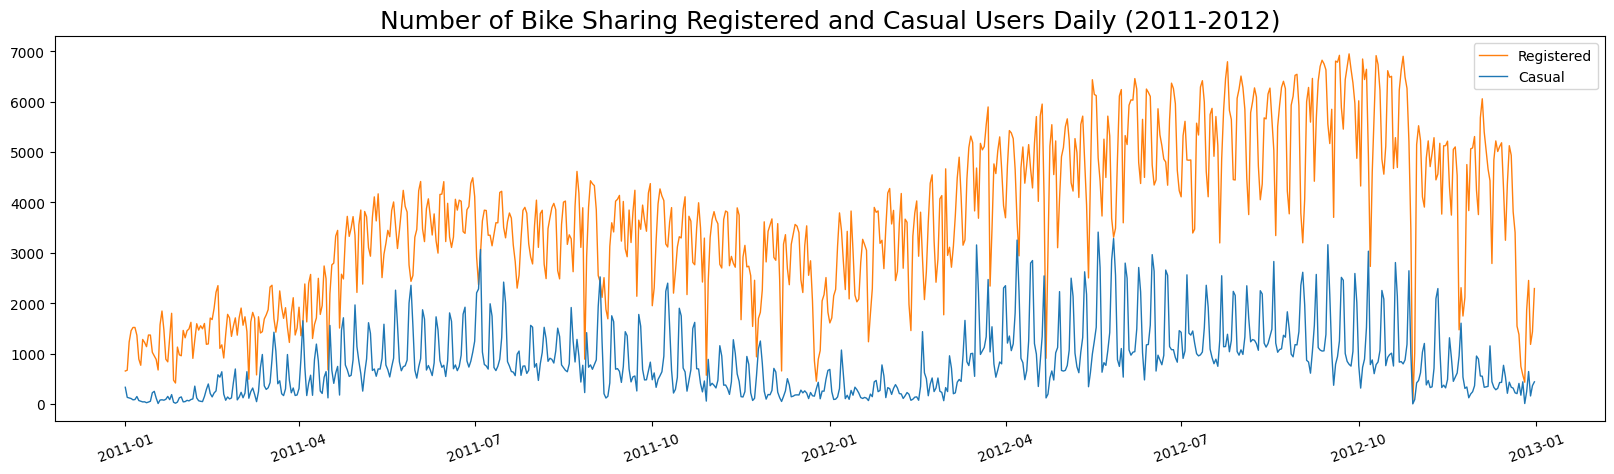

In [53]:
plt.figure(figsize=(20, 5))
plt.plot(
    all_df["dteday"],
    all_df["registered_day"],
    linewidth=1,
    label= 'Registered',
    color="#FF7F0E"
)
plt.plot(
    all_df["dteday"],
    all_df["casual_day"],
    linewidth=1,
    label= 'Casual',
    color="#1F77B4"
)
plt.title("Number of Bike Sharing Registered and Casual Users Daily (2011-2012)", loc="center", fontsize=18)
plt.xticks(fontsize=10, rotation=20)
plt.yticks(fontsize=10)
plt.legend()
plt.show()

In [55]:
month = {
    1: "January", 2: "February", 3: "March", 4: "April",
    5: "May", 6: "June", 7: "July", 8: "August",
    9: "September", 10: "October", 11: "November", 12: "December"
}

In [56]:
monthly_users_df = all_df.groupby("mnth").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
}).reset_index()

monthly_users_df["mnth"] = monthly_users_df["mnth"].map(month)

In [57]:
monthly_users_df

,mnth,casual,registered,cnt
0,January,12042,122891,134933
1,February,14963,136389,151352
2,March,44444,184476,228920
3,April,60802,208292,269094
4,May,75285,256401,331686
5,June,73906,272436,346342
6,July,78157,266791,344948
7,August,72039,279155,351194
8,September,70323,275668,345991
9,October,59760,262592,322352


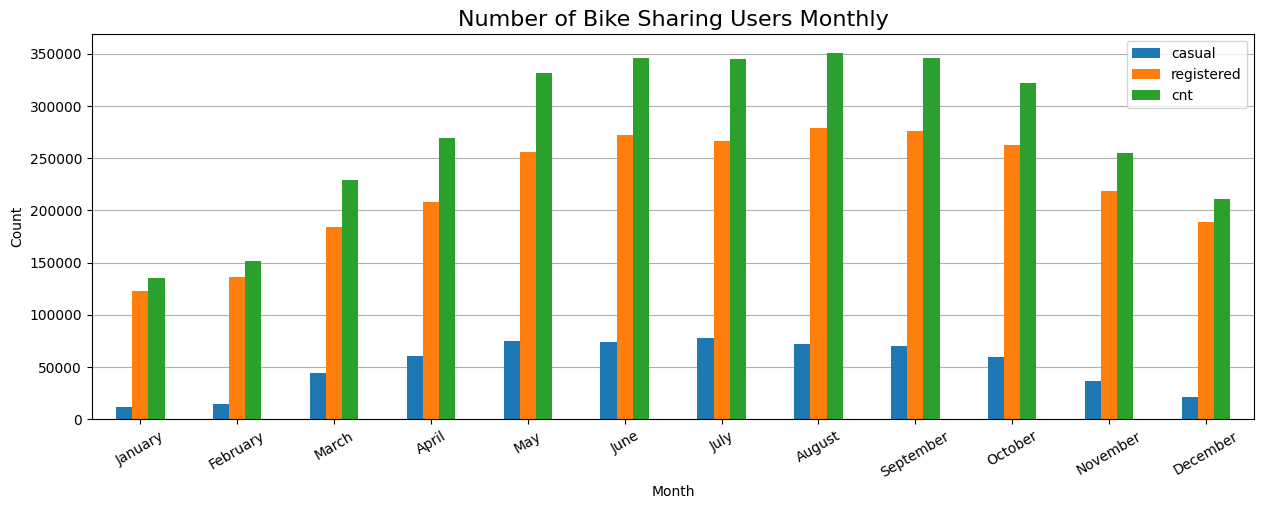

In [58]:
fig, ax = plt.subplots(figsize=(15, 5))
index = np.arange(12)

monthly_users_df.plot(kind='bar', ax = ax)

ax.set_axisbelow(True)
ax.grid(axis='y')

plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Number of Bike Sharing Users Monthly', fontsize= 16)
plt.xticks(index, monthly_users_df["mnth"], fontsize=10, rotation=30)
plt.legend()
plt.show()

In [59]:
all_df[all_df['yr'] == 2011].groupby(by=['weekday']).agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

,casual,registered,cnt
weekday,,,
friday,29453,152553,182006
monday,31560,148661,180221
saturday,59547,120196,179743
sunday,59603,117471,177074
thursday,22440,152112,174552
tuesday,23989,156349,180338
wednesday,20660,148509,169169


In [60]:
weekday_order = ["sunday", "monday", "tuesday", "wednesday", "thursday", "friday", "saturday"]

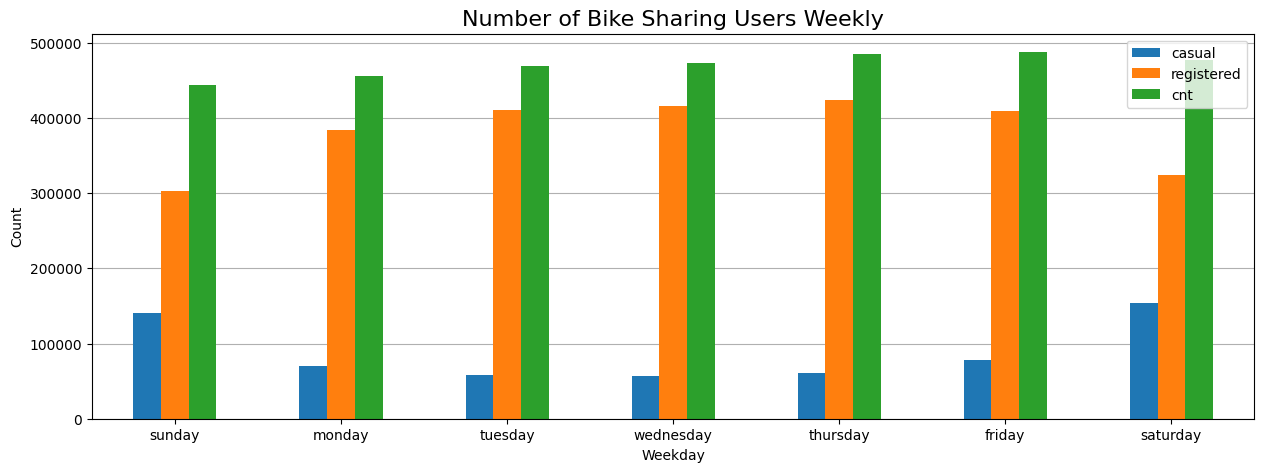

In [61]:
fig, ax = plt.subplots(figsize=(15, 5))

all_df.groupby(by=['weekday']).agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
}).reindex(weekday_order).plot(kind='bar', ax = ax)

ax.set_axisbelow(True)
ax.grid(axis='y')

plt.ylabel('Count')
plt.xlabel('Weekday')
plt.xticks(rotation= 0)
plt.title('Number of Bike Sharing Users Weekly', fontsize= 16)
plt.show()

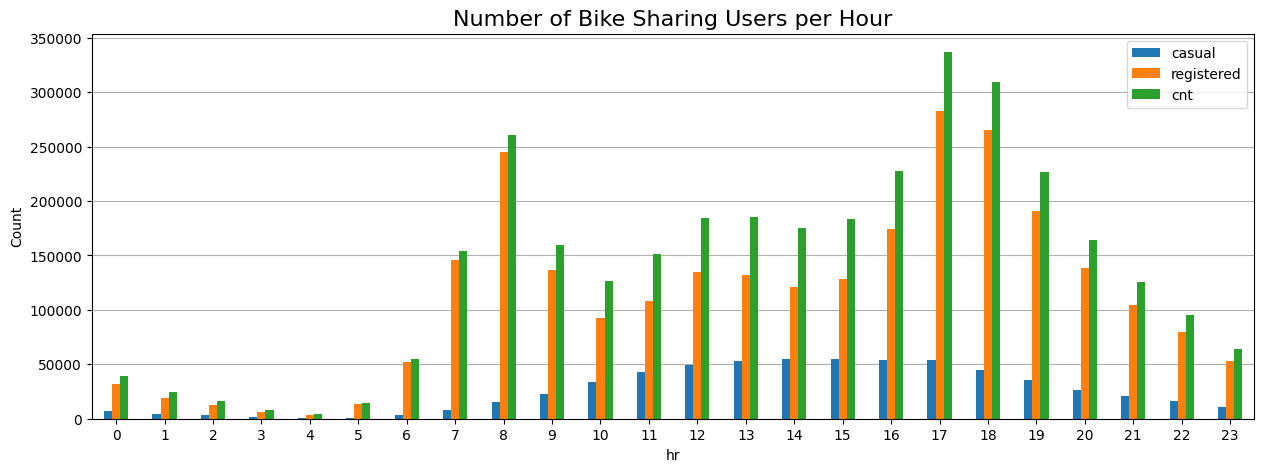

In [62]:
fig, ax = plt.subplots(figsize=(15, 5))

all_df.groupby(by=['hr']).agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
}).plot(kind='bar', ax = ax)

ax.set_axisbelow(True)
ax.grid(axis='y')

plt.ylabel('Count')
plt.xticks(rotation= 0)
plt.title('Number of Bike Sharing Users per Hour', fontsize= 16)
plt.show()

### Pertanyaan 2: Apa saja faktor yang mempengaruhi penggunaan bike sharing?

Berdasarkan Jenis Hari


In [63]:
all_df.groupby(by=['workingday']).agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

,casual,registered,cnt
workingday,,,
no,316732,683537,1000269
yes,303285,1989125,2292410


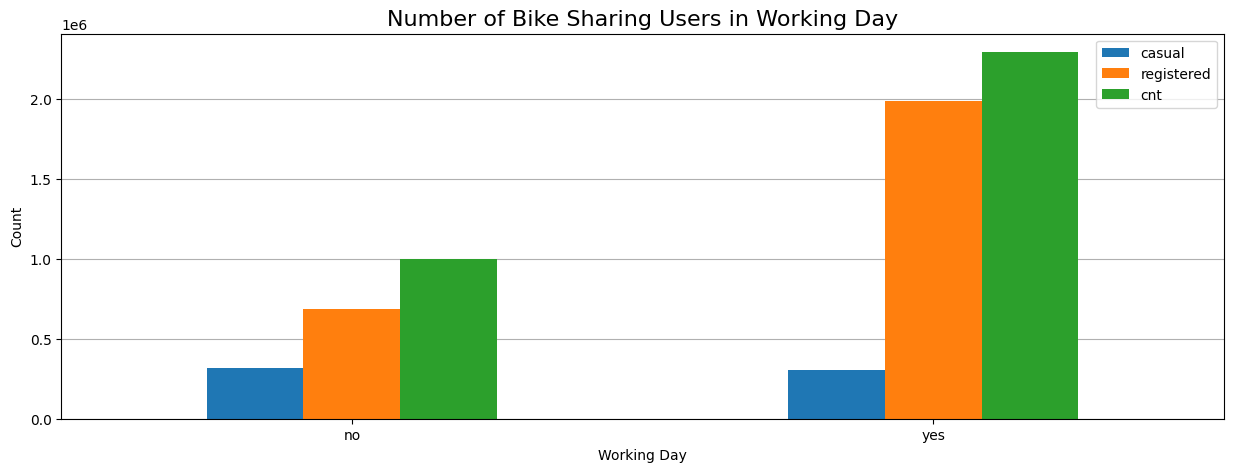

In [64]:
fig, ax = plt.subplots(figsize=(15, 5))

all_df.groupby(by=['workingday']).agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
}).plot(kind='bar', ax = ax)

ax.set_axisbelow(True)
ax.grid(axis='y')

plt.ylabel('Count')
plt.xlabel('Working Day')
plt.xticks(fontsize=10, rotation= 0)
plt.title('Number of Bike Sharing Users in Working Day', fontsize= 16)
plt.show()

In [65]:
all_df.groupby(by=['holiday']).agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

,casual,registered,cnt
holiday,,,
no,597658,2616586,3214244
yes,22359,56076,78435


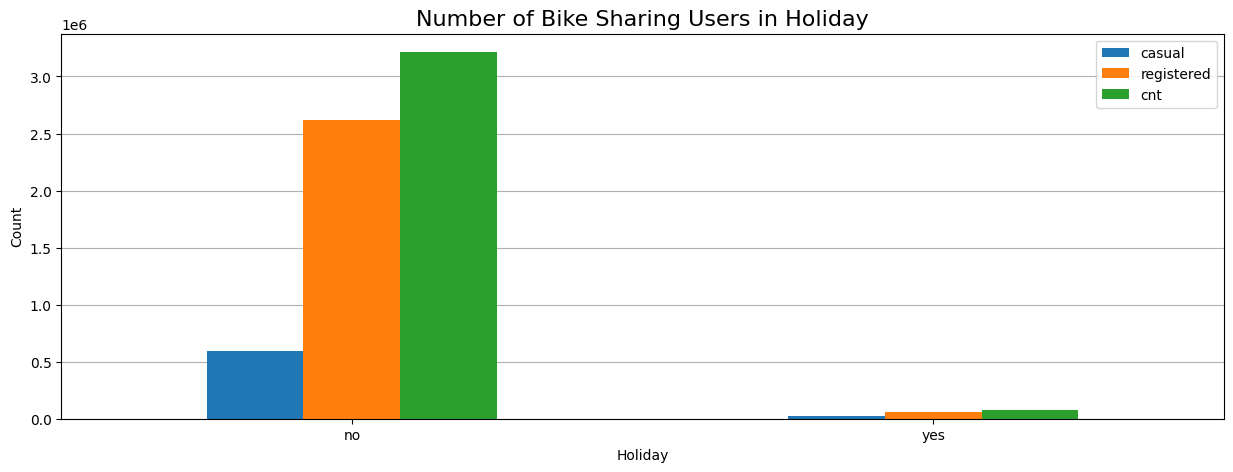

In [66]:
fig, ax = plt.subplots(figsize=(15, 5))

all_df.groupby(by=['holiday']).agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
}).plot(kind='bar', ax = ax)

ax.set_axisbelow(True)
ax.grid(axis='y')

plt.ylabel('Count')
plt.xlabel('Holiday')
plt.xticks(fontsize=10, rotation= 0)
plt.title('Number of Bike Sharing Users in Holiday', fontsize= 16)
plt.show()

In [67]:
all_df.groupby(by=['season']).agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

,casual,registered,cnt
season,,,
fall,129782,711831,841613
spring,203522,715067,918589
summer,226091,835038,1061129
winter,60622,410726,471348


In [68]:
season_order = ["spring", "summer", "fall", "winter"]

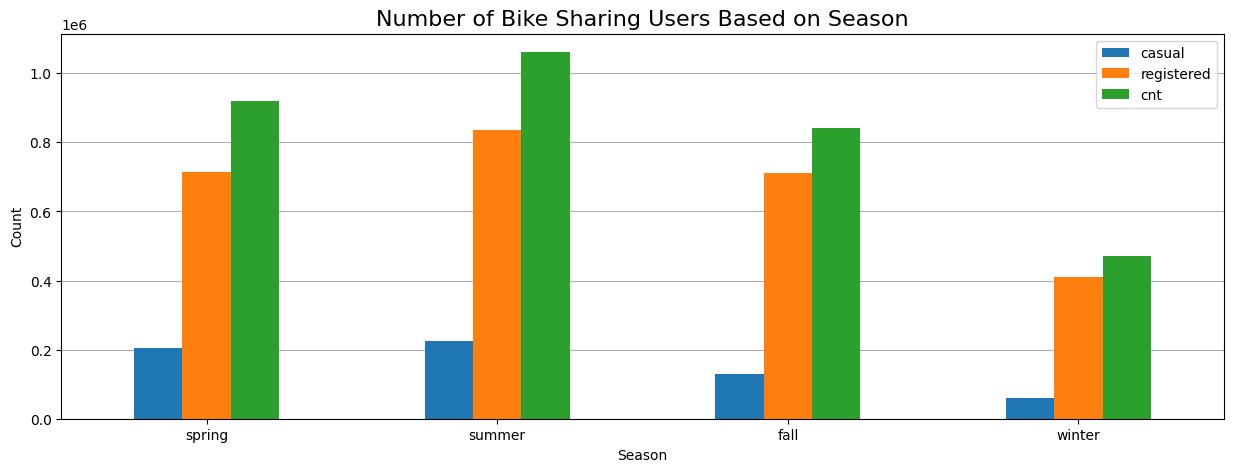

In [69]:
fig, ax = plt.subplots(figsize=(15, 5))

all_df.groupby(by=['season']).agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
}).reindex(season_order).plot(kind='bar', ax = ax)

ax.set_axisbelow(True)
ax.grid(axis='y')

plt.ylabel('Count')
plt.xlabel('Season')
plt.title('Number of Bike Sharing Users Based on Season', fontsize= 16)
plt.xticks(fontsize=10, rotation= 0)
plt.show()

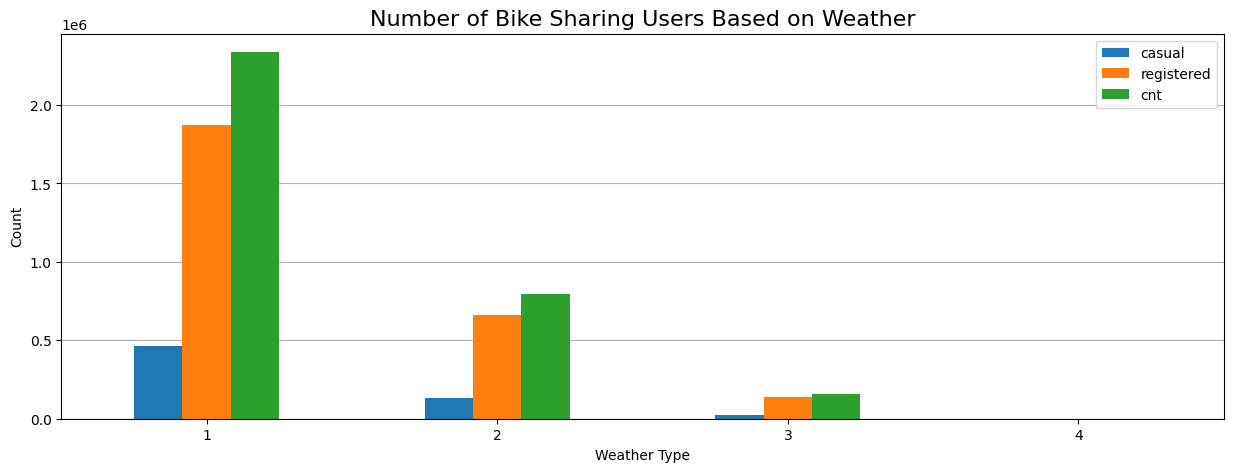

In [70]:
fig, ax = plt.subplots(figsize=(15, 5))

all_df.groupby(by=['weathersit']).agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
}).plot(kind='bar', ax = ax)

ax.set_axisbelow(True)
ax.grid(axis='y')

plt.ylabel('Count')
plt.xlabel('Weather Type')
plt.title('Number of Bike Sharing Users Based on Weather', fontsize= 16)
plt.xticks(fontsize=10, rotation= 0)
plt.show()

## Conclusion

- Tren dari penggunaan bike sharing sepanjang tahun 2011 dan 2012 cenderung meningkat dengan kenaikan yang cukup fluktuaktif, dengan komposisi pengguna mayoritas merupakan pengguna terdaftar (registered). Kenaikan  terjadi ketika mendekati pertengahan tahun dan mulai turun ketika memasuki akhir tahun. Secara bulanan, puncak penggunaan dari bike sharing adalah pada bulan Agustus. Secara mingguan, penggunaan bike sharing paling banyak pada hari Jumat. Jam paling banyak pemakaian bike sharing adalah pukul 8 pagi dan jam pulang kerja pukul 5 sore, yang menandakan bike sharing ini banyak digunakan oleh pengguna untuk mobilitas ke tempat kerja

- Ada beberapa faktor yang mempengaruhi penggunaan bike sharing yaitu sebagai berikut
    * Hari
      
      Penggunaan dari bike sharing mayoritas pada hari kerja dan bukan hari libur. Hal ini menandakan pengguna mayoritas merupakan pekerja dan bukan turis.

    * Musim

      Penggunaan dari bike sharing mayoritas pada musim panas pada bulan Juni hingga September

    * Cuaca

      Penggunaan dari bike sharing mayoritas pada cuaca kategori 1 yaitu, cuaca cerah dan sedikit berawan